In [1]:
import pandas as pd          
import numpy as np   
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime  
from pandas import Series  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MARUTI.csv')

In [4]:
data = data[['Date','Open','High','Low','Close','Volume','VWAP']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4098 non-null   object 
 1   Open    4098 non-null   float64
 2   High    4098 non-null   float64
 3   Low     4098 non-null   float64
 4   Close   4098 non-null   float64
 5   Volume  4098 non-null   int64  
 6   VWAP    4098 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 224.2+ KB


In [6]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


In [7]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [8]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [9]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [10]:
data_vwap = data[['Date','VWAP']]
data_vwap['Date'] = data_vwap['Date'].apply(pd.to_datetime)
data_vwap.head()

<ipython-input-10-6fe4201d5c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vwap['Date'] = data_vwap['Date'].apply(pd.to_datetime)


,Date,VWAP
0,2003-07-09,165.95
1,2003-07-10,166.74
2,2003-07-11,172.45
3,2003-07-14,177.91
4,2003-07-15,176.88


In [11]:
data_vwap['year'] = data_vwap.Date.dt.year
data_vwap['month'] = data_vwap.Date.dt.month
data_vwap['day'] = data_vwap.Date.dt.day
data_vwap['day of week'] = data_vwap.Date.dt.dayofweek

#Set Date column as the index column.
data_vwap.set_index('Date', inplace=True)
data_vwap.head()

<ipython-input-11-27ac835208d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vwap['year'] = data_vwap.Date.dt.year
<ipython-input-11-27ac835208d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vwap['month'] = data_vwap.Date.dt.month
<ipython-input-11-27ac835208d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


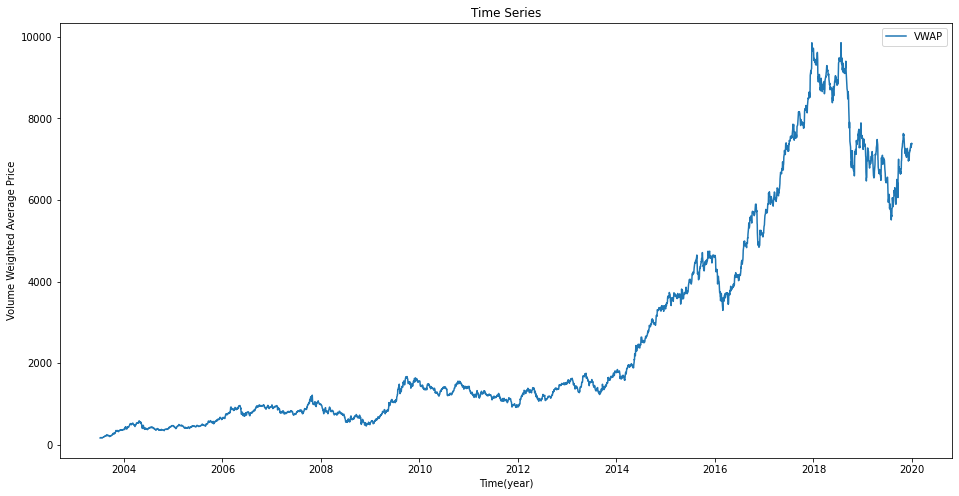

In [12]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(data_vwap['VWAP'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<AxesSubplot:xlabel='year'>

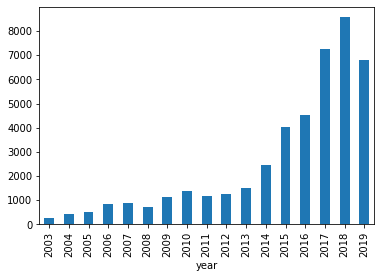

In [13]:
data_vwap.groupby('year')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

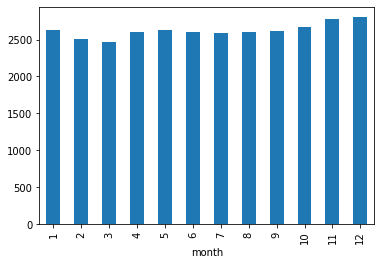

In [14]:
data_vwap.groupby('month')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='day'>

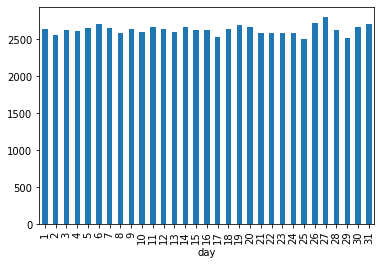

In [15]:
# Daily VWAP of Maruti Stocks

data_vwap.groupby('day')['VWAP'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

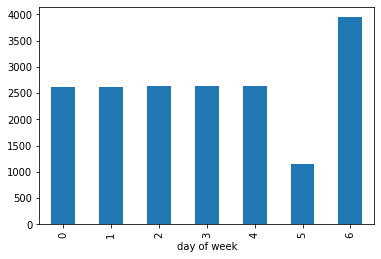

In [16]:
data_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

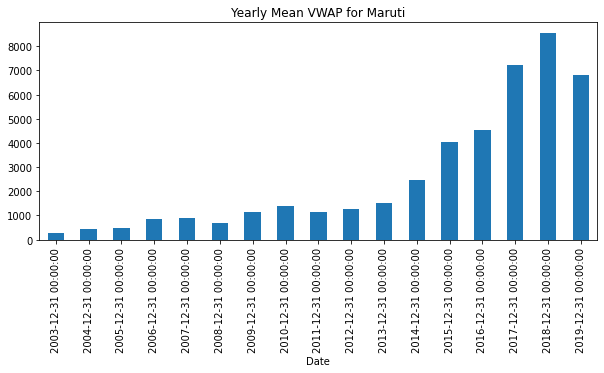

In [17]:
data_vwap['VWAP'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for Maruti')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

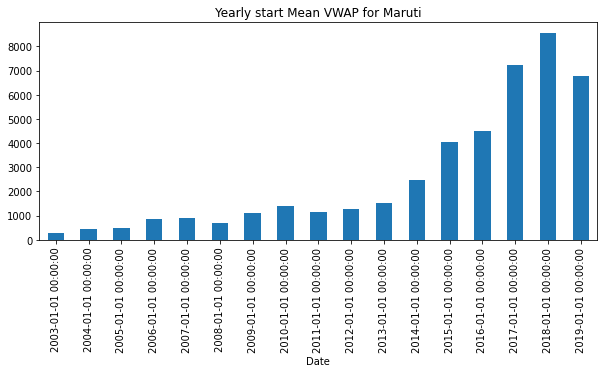

In [18]:
data_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

<AxesSubplot:xlabel='Date'>

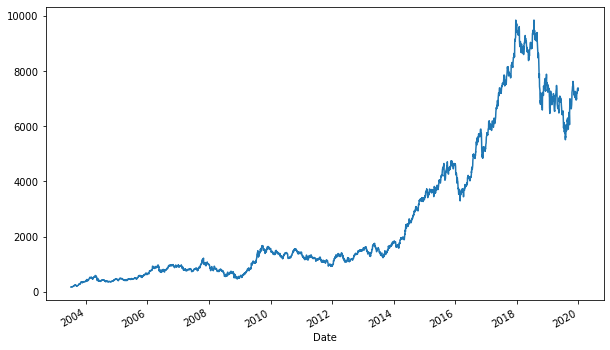

In [19]:
data_vwap['VWAP'].plot(figsize = (10,6))

<AxesSubplot:xlabel='Date'>

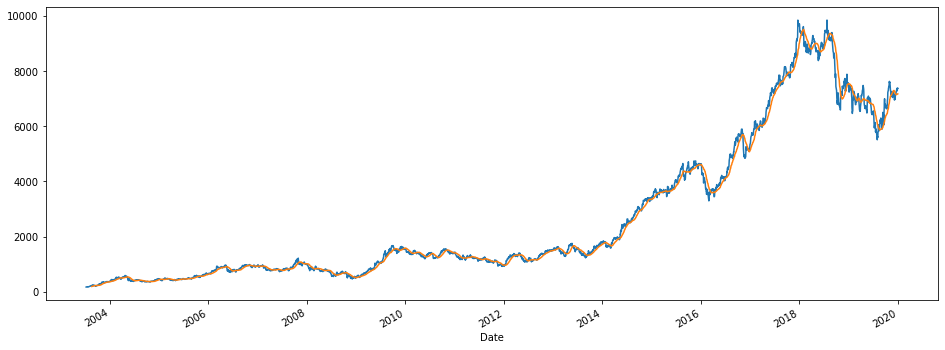

In [20]:
data_vwap['VWAP'].plot()
data_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

In [21]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [22]:
import pmdarima as pm

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
train = pd.read_csv('/content/drive/MyDrive/MARUTI.csv')

In [25]:
train = train[:-100]
test = train[-100:]

<function matplotlib.pyplot.show(close=None, block=None)>

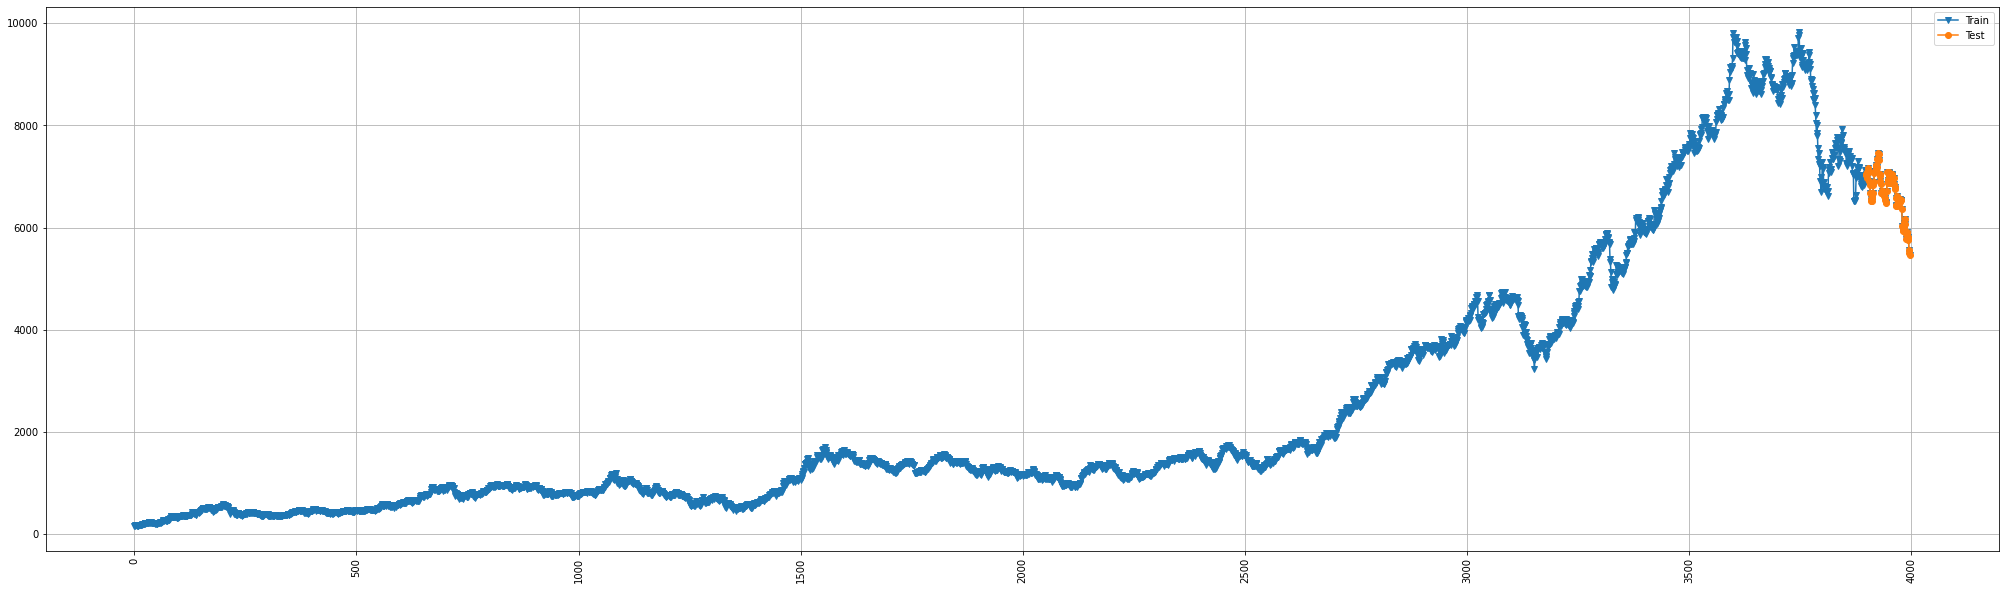

In [26]:
plt.figure(figsize = (35,10))
plt.grid()
plt.plot(train['Close'], marker='v', label='Train')
plt.plot(test['Close'], marker = 'o', label = 'Test')
plt.xticks(rotation=90)
plt.legend()
plt.show